## Import Libraries

In [1]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Create espresso instances

In [2]:
git_repo_folder='/Users/josesho/bin/git-repos/espresso'

datadir1=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/22')
datadir2=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/29')
datadir3=os.path.join(git_repo_folder,'data/starvation_gradient/0-Hrs')
datadir4=os.path.join(git_repo_folder,'data/starvation_gradient/24-Hrs')
datadir5=os.path.join(git_repo_folder,'data/starvation_gradient/48-Hrs')
datadir6=os.path.join(git_repo_folder,'data/24-Hrs-starved-choice')

twotubes22=esp.espresso(folder=datadir1)
twotubes29=esp.espresso(folder=datadir2)

starvation0=esp.espresso(folder=datadir3)
starvation0.attach_label(label_name='starved_time',label_value='0-Hrs')

starvation24=esp.espresso(folder=datadir4)
starvation24.attach_label(label_name='starved_time',label_value='24-Hrs')

starvation48=esp.espresso(folder=datadir5)
starvation48.attach_label(label_name='starved_time',label_value='48-Hrs')

starved=starvation0+starvation24+starvation48

starved_choice=esp.espresso(folder=datadir6)

starved_time has been added as a new label, with '0-Hrs' as the custom value.
starved_time has been added as a new label, with '24-Hrs' as the custom value.
starved_time has been added as a new label, with '48-Hrs' as the custom value.


## Plotting

### Percent Feeding (DONE)

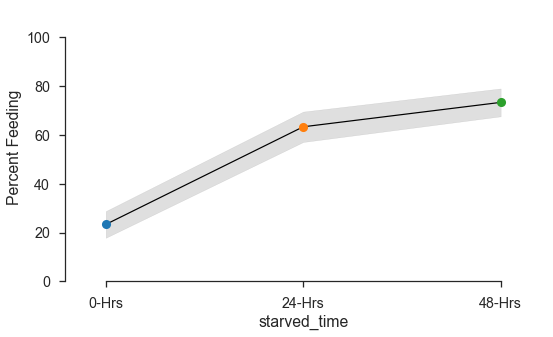

In [9]:
f,s=starved.plot.percent_feeding(group_by='starved_time',
                                    palette_type='categorical',time_end=120)


### Rasters (DONE)

In [3]:
starved_choice

2 feedlogs with a total of 60 flies.
1 genotype ['w1118'].
1 temperature [29].
2 foodtypes ['100mM_Sucrose' '100mM_Sucrose_100mM_Arabinose'].

Coloring rasters by FoodChoice
Grouping rasters by Genotype
plotting w1118 rasters
Be patient, this can a while!


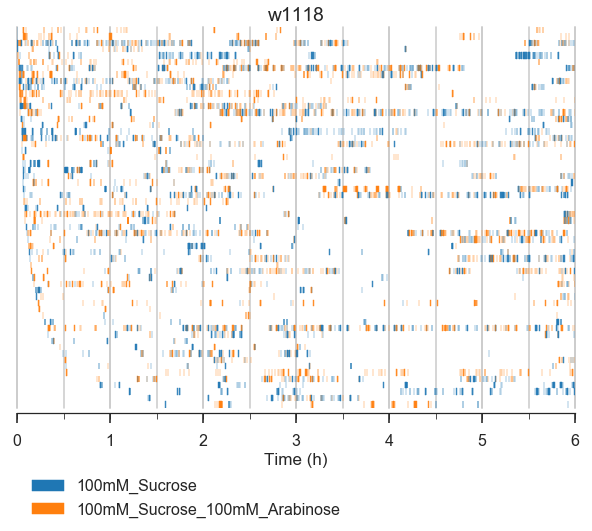

In [6]:
starved_choice.plot.rasters()

Coloring rasters by Genotype
Grouping rasters by FoodChoice
plotting 100mM_Sucrose rasters
Be patient, this can a while!
plotting 100mM_Sucrose_100mM_Arabinose rasters
Be patient, this can a while!


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10dd30668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ddd2cf8>], dtype=object)

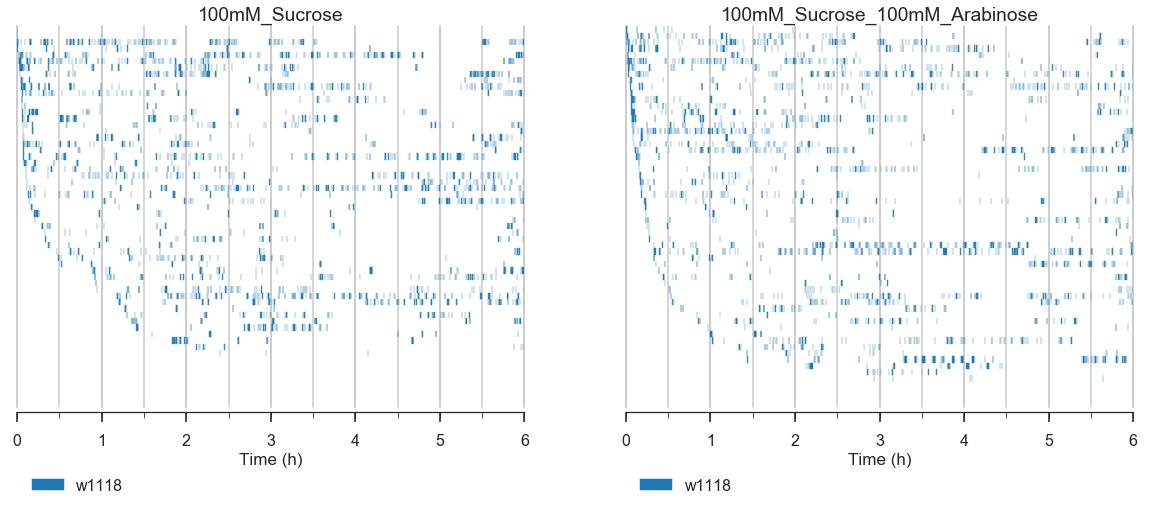

In [15]:
starved_choice.plot.rasters(group_by='FoodChoice',
                            color_by='Genotype')

### Timecourse (DONE)

#### Feed Volume

Coloring feed volume time course by Genotype
Grouping feed volume time course by FoodChoice


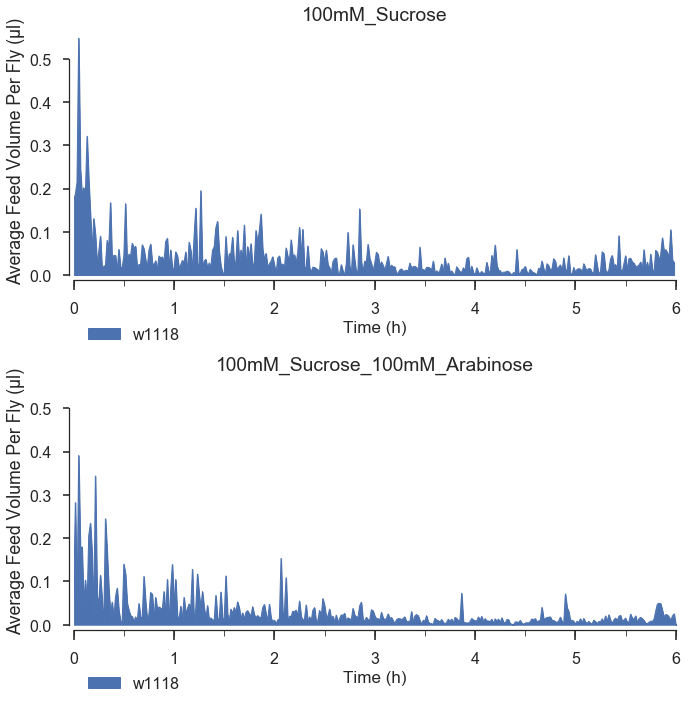

In [18]:
f,ax=plt.subplots(2,figsize=(10,10))
starved_choice.plot.timecourse.feed_volume(group_by='FoodChoice',color_by='Genotype',
                                           resample_by='1min',
                                           gridlines_minor=False,
                                           ax=ax)
f.tight_layout()

Coloring feed volume time course by FoodChoice
Grouping feed volume time course by Genotype


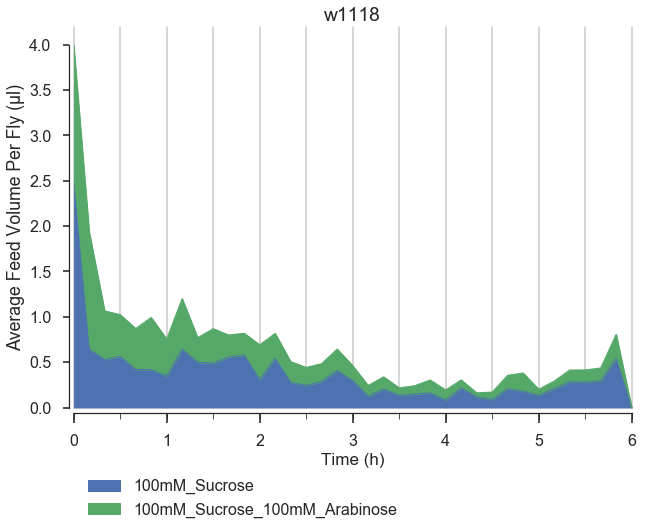

In [23]:
starved_choice.plot.timecourse.feed_volume(resample_by='10min',)

#### Feed Count

Coloring feed volume time course by FoodChoice
Grouping feed volume time course by Genotype


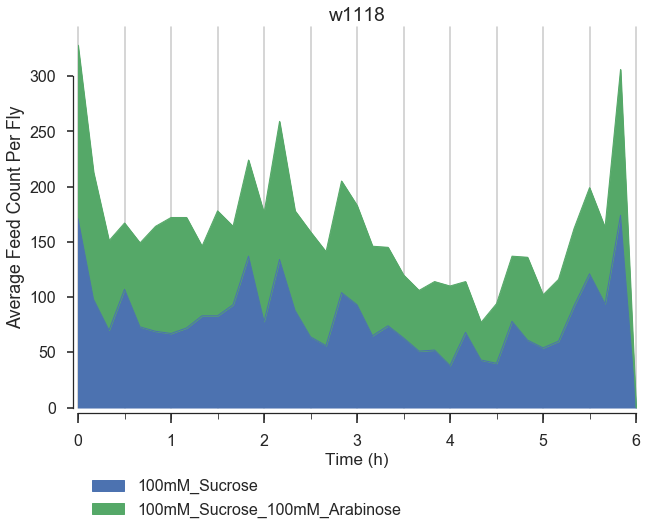

In [3]:
starved_choice.plot.timecourse.feed_count()

#### Feed Speed

Coloring feed volume time course by FoodChoice
Grouping feed volume time course by Genotype


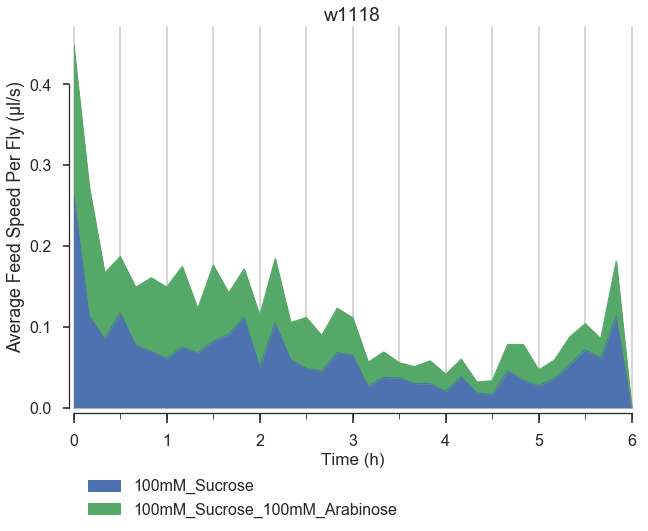

In [12]:
starved_choice.plot.timecourse.feed_speed()

### Cumulative Plots

In [3]:
tubes=twotubes22+twotubes29
tubes

2 feedlogs with a total of 60 flies.
3 genotypes ['w1118;Trh-Gal4' 'w1118;UAS-Gz-TrpA1;Trh-Zal'
 'Trh-Gal4>UAS-GZ-TrpA1_Trh-ZAL'].
2 temperatures [22 29].
1 foodtype ['5% sucrose + 5% yeast extract'].

In [82]:
grpby=esp._munger.groupby_resamp_sum(starved_choice.feeds,group_by='FoodChoice',color_by='Genotype',)
cumsum=esp._munger.cumsum_for_cumulative(grpby,group_by='FoodChoice',color_by='Genotype')

In [83]:
cumsum

,FoodChoice,Genotype,FlyID,RelativeTime_s,FlyCountInChamber,AverageFeedVolumePerFly_µl,Cumulative Feed Count,Cumulative Volume (nl),time_s
0,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:10:00,1.0,0.001241,1.0,1.241,600
1,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:20:00,1.0,0.001241,1.0,1.241,1200
2,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:30:00,1.0,0.001241,1.0,1.241,1800
3,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:40:00,1.0,0.001241,1.0,1.241,2400
4,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:50:00,1.0,0.001241,1.0,1.241,3000
5,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 01:00:00,1.0,0.001241,1.0,1.241,3600
6,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 01:10:00,1.0,0.001241,1.0,1.241,4200
7,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 01:20:00,1.0,0.001241,1.0,1.241,4800
8,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 01:30:00,1.0,0.001241,1.0,1.241,5400
9,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 01:40:00,1.0,0.001241,1.0,1.241,6000


In [96]:
# temp_plotdf=cumsum[cumsum['FoodChoice']=='100mM_Sucrose_100mM_Arabinose'].copy()
temp_plotdf=cumsum[cumsum['FoodChoice']=='100mM_Sucrose'].copy()
temp_plotdf.reset_index(drop=True,inplace=True)
temp_plotdf.sort_values(['FlyID','time_s'],inplace=True)
temp_plotdf.head()

,FoodChoice,Genotype,FlyID,RelativeTime_s,FlyCountInChamber,AverageFeedVolumePerFly_µl,Cumulative Feed Count,Cumulative Volume (nl),time_s
0,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:10:00,1.0,0.001241,1.0,1.241,600
1,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:20:00,1.0,0.001241,1.0,1.241,1200
2,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:30:00,1.0,0.001241,1.0,1.241,1800
3,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:40:00,1.0,0.001241,1.0,1.241,2400
4,100mM_Sucrose,w1118,2017-08-25_10-57-52_Fly1,1970-01-01 00:50:00,1.0,0.001241,1.0,1.241,3000


In [94]:
# temp_plotdf.pivot(index='time_s',columns='Cumulative Feed Count')

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


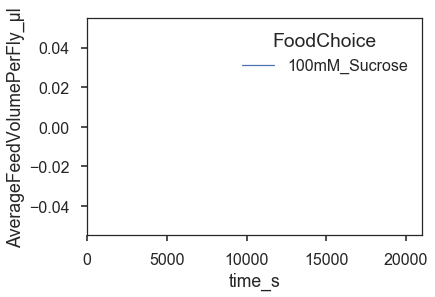

In [97]:
yvar='AverageFeedVolumePerFly_µl'
p=sns.tsplot(data=temp_plotdf,ci=95,
               time='time_s',unit='FlyID',
               condition='FoodChoice',value=yvar,
            #    color=genotype_palette,
            #    alpha=temp_alpha,
               linewidth=1.25)

Coloring feed volume time course by Genotype
Grouping feed volume time course by FoodChoice


/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x116297390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116287e10>], dtype=object)

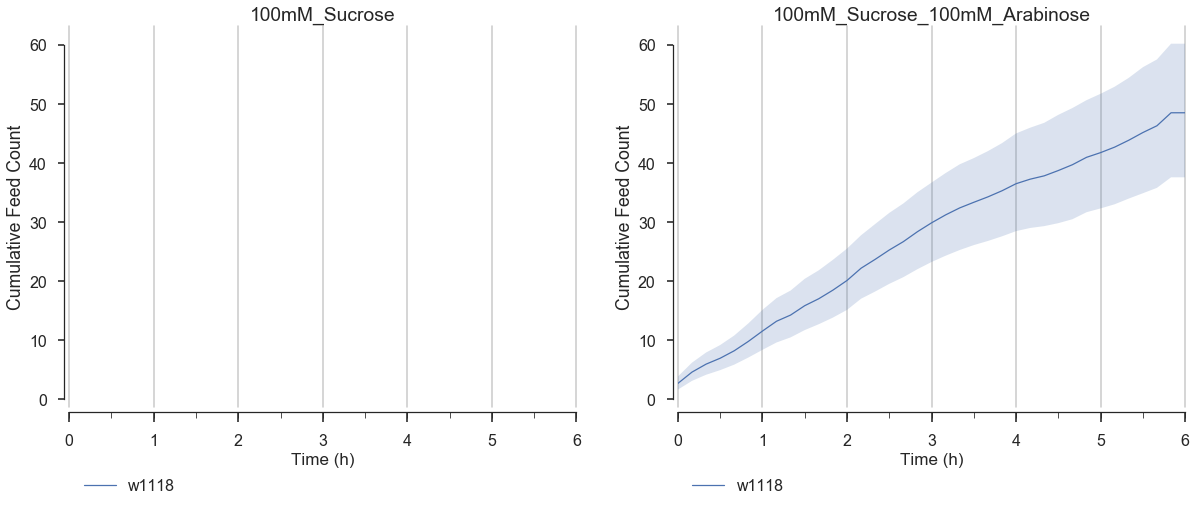

In [16]:
starved_choice.plot.cumulative.feed_count(group_by='FoodChoice',color_by='Genotype',
                                         gridlines_minor=False)

### Contrast (WIP)

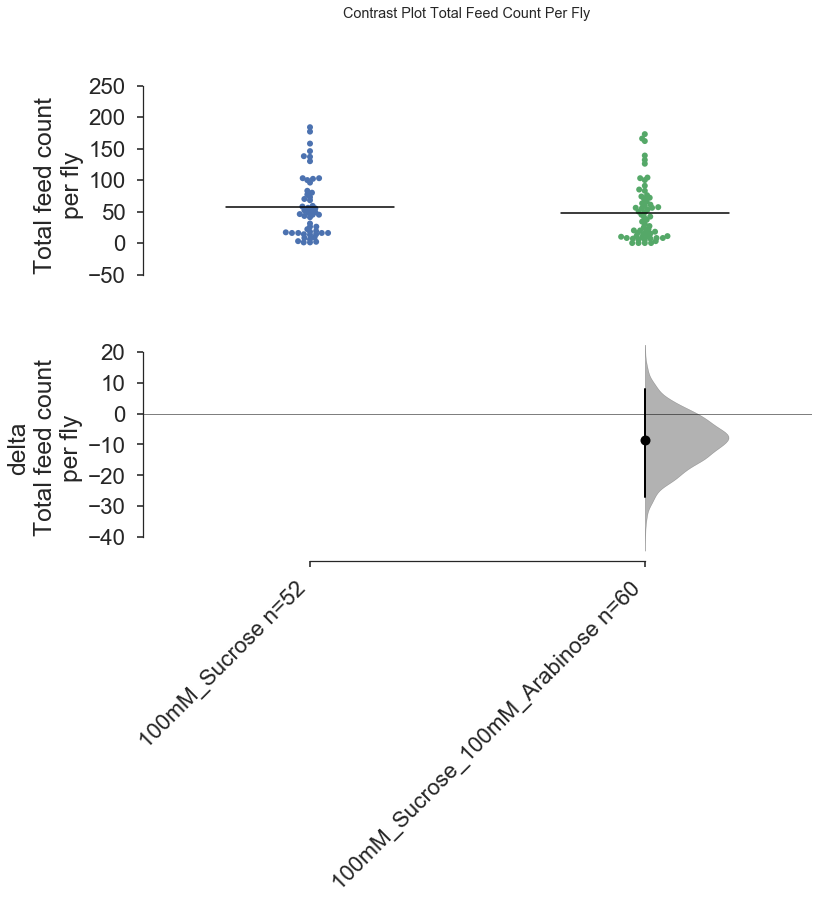

In [10]:
f,summ=starved_choice.plot.contrast.feed_count_per_fly(group_by='FoodChoice')